<a href="https://colab.research.google.com/github/Nish077/BDI_QuestionWeightagePaper_dataset/blob/main/BDI_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost shap

import pandas as pd
import numpy as np
import os
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import shap
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/BDI_data/BDI_1 3(Rawdata).csv')
print("Data shape:", data.shape)
data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data shape: (1040, 24)


,age,sex,BDI1,BDI2,BDI3,BDI4,BDI5,BDI6,BDI7,BDI8,...,BDI13,BDI14,BDI15,BDI16,BDI17,BDI18,BDI19,BDI20,BDI21,BDITotaScore
0,23.0,0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,...,0.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,0.0,20.0
1,29.0,1,1.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,...,3.0,0.0,3.0,1.0,0.0,1.0,0.0,3.0,3.0,27.0
2,46.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,12.0
3,46.0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,8.0
4,43.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,9.0


In [3]:
data.shape
data['sex'] = data['sex'].astype(float) # For floats
data.head()

,age,sex,BDI1,BDI2,BDI3,BDI4,BDI5,BDI6,BDI7,BDI8,...,BDI13,BDI14,BDI15,BDI16,BDI17,BDI18,BDI19,BDI20,BDI21,BDITotaScore
0,23.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,...,0.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,0.0,20.0
1,29.0,1.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,...,3.0,0.0,3.0,1.0,0.0,1.0,0.0,3.0,3.0,27.0
2,46.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,12.0
3,46.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,8.0
4,43.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,9.0


In [4]:
# prompt: i want to get unique values present in the column

# Assuming 'data' DataFrame is already loaded as in the previous code.
unique_scorevalues = data['BDI2'].unique()
unique_scorevalues

array([0., 1., 3., 2.])

In [5]:
data = data.iloc[:, 2:]

In [6]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values if necessary
data = data.dropna()  # Simple option to drop rows with missing values
data.shape


BDI1            0
BDI2            0
BDI3            0
BDI4            0
BDI5            0
BDI6            0
BDI7            0
BDI8            0
BDI9            0
BDI10           0
BDI11           0
BDI12           0
BDI13           0
BDI14           0
BDI15           0
BDI16           0
BDI17           0
BDI18           0
BDI19           0
BDI20           0
BDI21           0
BDITotaScore    0
dtype: int64


(1040, 22)

In [7]:
# Define feature set (BDI questions) and target variable
X = data[[f'BDI{i}' for i in range(1, 22)]]
y = data['BDITotaScore']



In [8]:
#test train split for the questions and the general demograph
random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
X_train.shape


(832, 21)

In [9]:
y_train.shape

(832,)

[0]	validation_0-rmse:8.38173	validation_0-mae:6.39155	validation_1-rmse:8.38716	validation_1-mae:6.51001
[50]	validation_0-rmse:1.73119	validation_0-mae:1.37150	validation_1-rmse:2.35743	validation_1-mae:1.70002
[100]	validation_0-rmse:0.72965	validation_0-mae:0.56116	validation_1-rmse:1.50982	validation_1-mae:0.98989
[150]	validation_0-rmse:0.55400	validation_0-mae:0.42284	validation_1-rmse:1.35879	validation_1-mae:0.89575
[200]	validation_0-rmse:0.47956	validation_0-mae:0.36589	validation_1-rmse:1.30777	validation_1-mae:0.85753
[250]	validation_0-rmse:0.42542	validation_0-mae:0.32414	validation_1-rmse:1.28165	validation_1-mae:0.83395
[300]	validation_0-rmse:0.38803	validation_0-mae:0.29377	validation_1-rmse:1.26692	validation_1-mae:0.81690
[350]	validation_0-rmse:0.35027	validation_0-mae:0.26279	validation_1-rmse:1.24502	validation_1-mae:0.79104
[400]	validation_0-rmse:0.32497	validation_0-mae:0.24213	validation_1-rmse:1.23569	validation_1-mae:0.77767
[450]	validation_0-rmse:0.30409

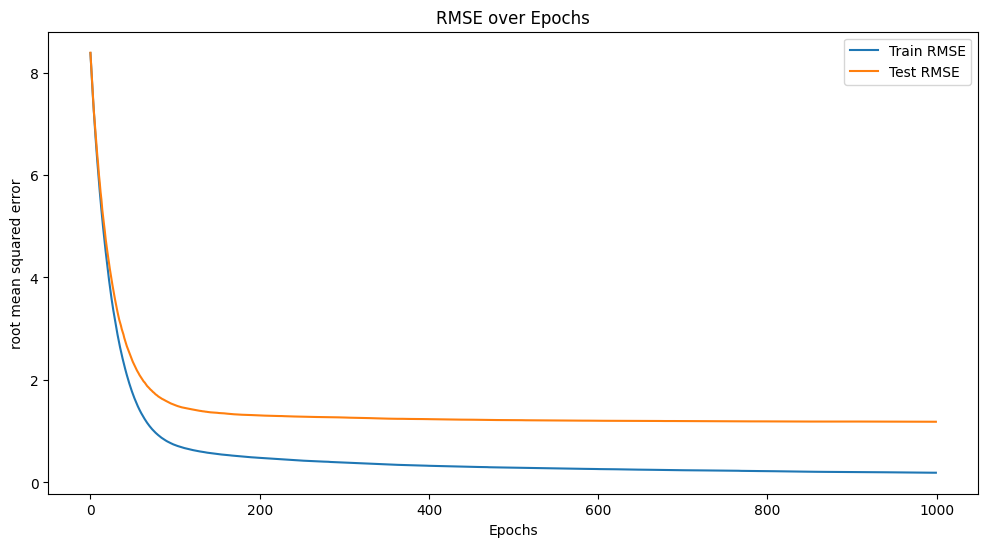

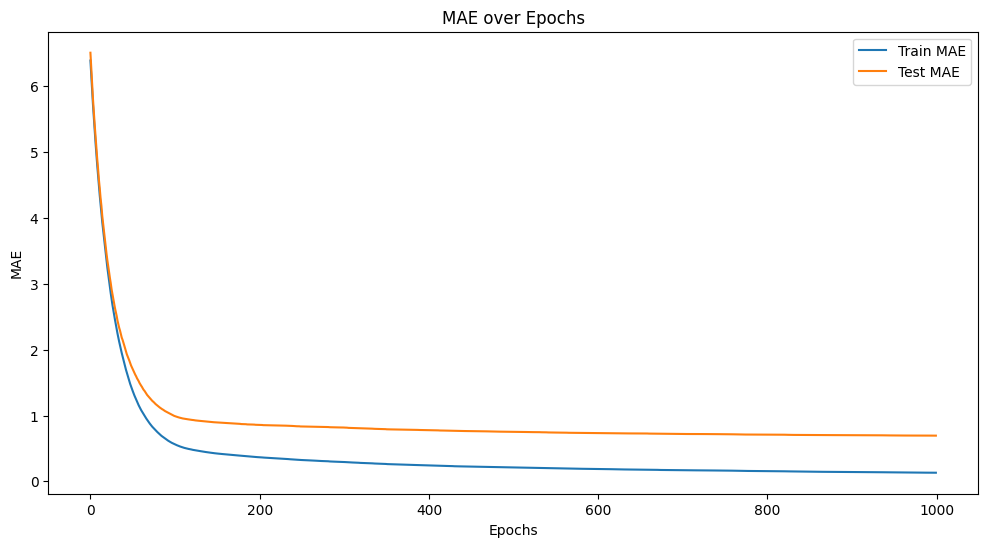

R-squared: 0.9812201561747677
Mean Squared Error (MSE): 1.4030810079877738
Root Mean Squared Error (RMSE): 1.1845172045976258
Mean Absolute Error (MAE): 0.6947158189633718


In [11]:
# Initialize the base model with general settings
model = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=1000, learning_rate=0.05, max_depth= 4, random_state=random_state)
# Define the evaluation set and metrics
eval_set = [(X_train, y_train), (X_test, y_test)]

# Set evaluation metrics before fitting
model.set_params(eval_metric=['rmse', 'mae'])

# Fit the model with the evaluation set to track metrics over epochs
history = model.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=50
)

# Retrieve the training history from the model
results = model.evals_result()
epochs = range(len(results['validation_0']['rmse']))

# Plot RMSE over epochs for training and test sets
plt.figure(figsize=(12, 6))
plt.plot(epochs, results['validation_0']['rmse'], label='Train RMSE')
plt.plot(epochs, results['validation_1']['rmse'], label='Test RMSE')
plt.xlabel('Epochs')
plt.ylabel('root mean squared error')
plt.title('RMSE over Epochs')
plt.legend()
plt.show()

# Plot MAE over epochs for training and test sets
plt.figure(figsize=(12, 6))
plt.plot(epochs, results['validation_0']['mae'], label='Train MAE')
plt.plot(epochs, results['validation_1']['mae'], label='Test MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('MAE over Epochs')
plt.legend()
plt.show()
# Evaluate the final model with test data
y_pred = model.predict(X_test)
# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=True) # Remove or adjust this line
rmse = np.sqrt(mse)  # Calculate RMSE manually if 'squared' parameter is not available
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

 99%|===================| 820/832 [00:21<00:00]       

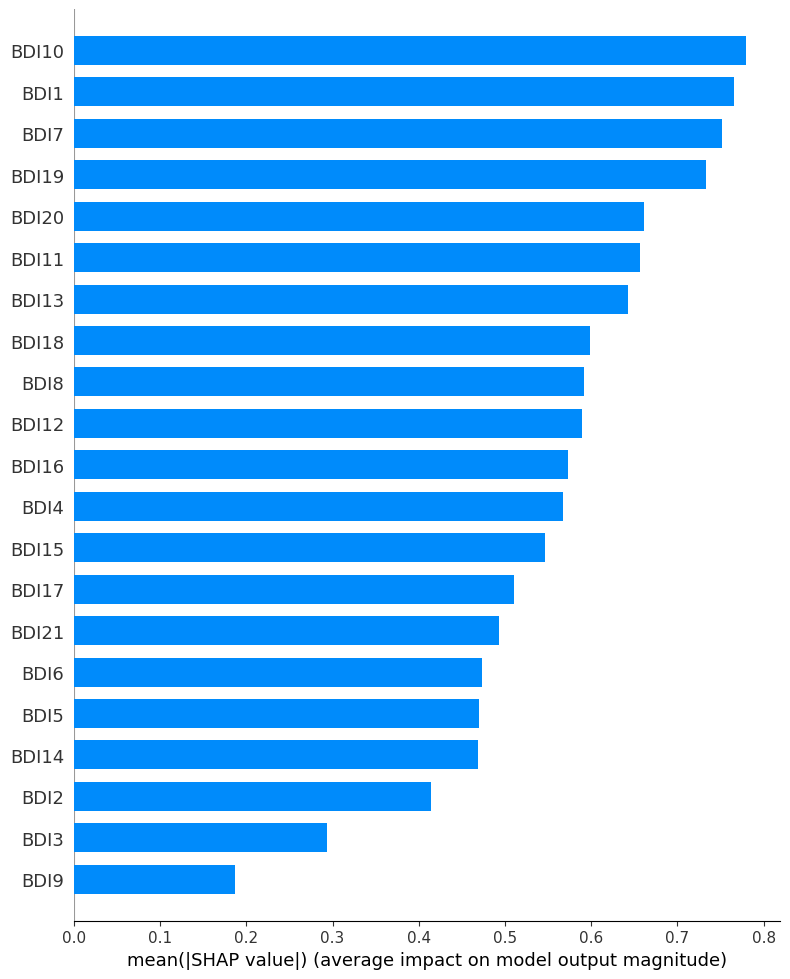

In [12]:
# Create a copy of X_train excluding the 'age', 'education', and 'sex' columns
X_train_for_shap = X_train.copy()

# Initialize the SHAP explainer with the original training data (X_train)
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train) # Explain predictions for data with only BDI questions

# Generate the SHAP summary plot for only the BDI questions
shap.summary_plot(shap_values, X_train, plot_type="bar", max_display=22)

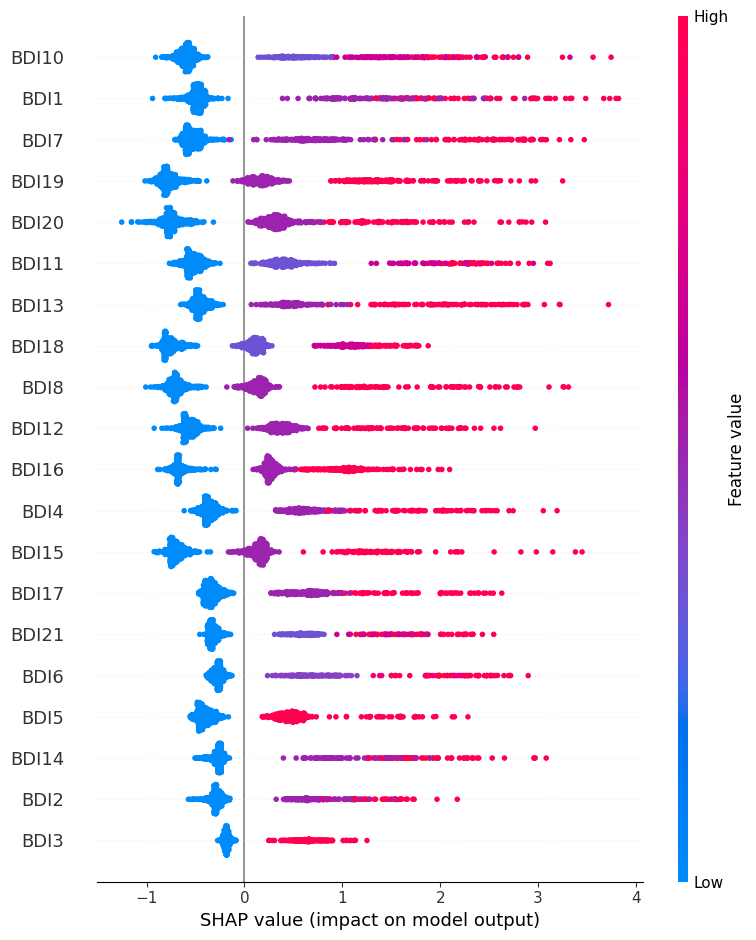

In [13]:
# Detailed SHAP value plot for individual prediction
shap.summary_plot(shap_values, X_train)  # Detailed plot of each feature’s impact


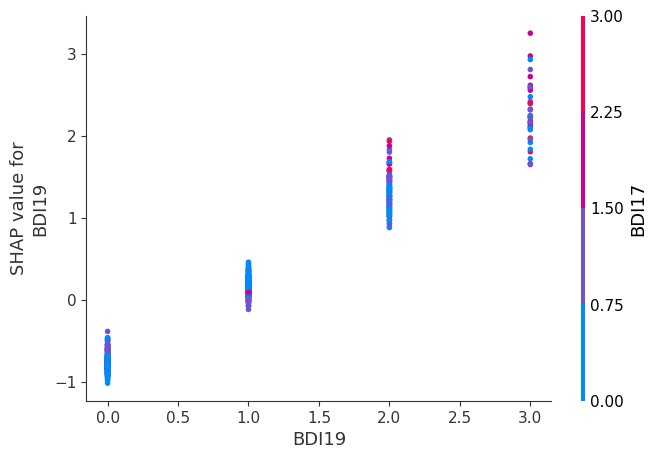

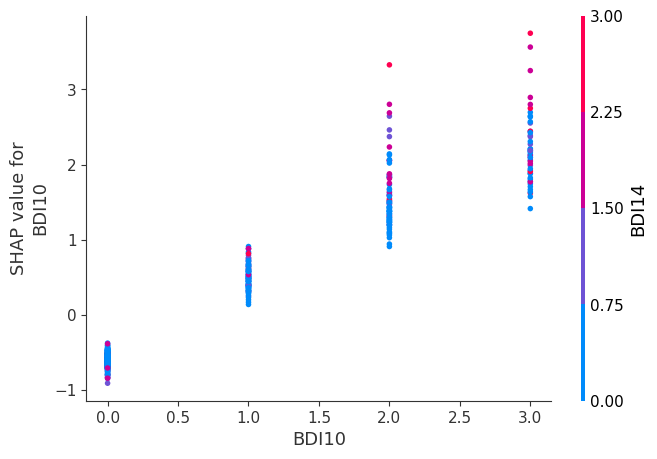

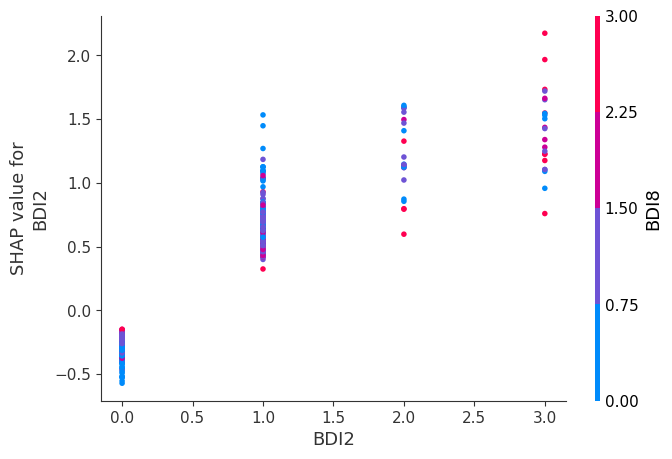

In [14]:

# Example of SHAP dependence plot for a specific question
shap.dependence_plot("BDI19", shap_values.values, X_train)
shap.dependence_plot("BDI10", shap_values.values, X_train)
shap.dependence_plot("BDI2", shap_values.values, X_train)

In [15]:
np.save('shap_values.npy', shap_values)